In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import *
from tqdm import tqdm
from os import listdir

In [3]:
df_res = pd.read_csv('data/data_collection_2023-04-19.csv')

C:\Users\VIANEY~1\AppData\Local\Temp/ipykernel_24808/1391601840.py:1: DtypeWarning: Columns (2,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df_res = pd.read_csv('data/data_collection_2023-04-19.csv')


In [4]:
df_res.head()

,GroupOfLine,TransportMode,LineNumber,Destination,JourneyDirection,StopAreaName,StopAreaNumber,StopPointNumber,StopPointDesignation,TimeTabledDateTime,ExpectedDateTime,DisplayTime,JourneyNumber,Deviations,RequestTime,Station
0,tunnelbanans blå linje,METRO,11.0,Kungsträdgården,2.0,T-Centralen,1051.0,3052.0,6,2023-04-19T08:15:00,2023-04-19T08:15:00,08:15,30019.0,NaN,2023-04-19 08:15:40.685617,T-Centralen
1,tunnelbanans gröna linje,METRO,17.0,Åkeshov,1.0,T-Centralen,1051.0,2051.0,1,2023-04-19T08:15:00,2023-04-19T08:15:14,Nu,11005.0,NaN,2023-04-19 08:15:40.685617,T-Centralen
2,tunnelbanans blå linje,METRO,10.0,Hjulsta,1.0,T-Centralen,1051.0,3051.0,5,2023-04-19T08:15:30,2023-04-19T08:15:30,08:15,30325.0,NaN,2023-04-19 08:15:40.685617,T-Centralen
3,tunnelbanans röda linje,METRO,14.0,Fruängen,2.0,T-Centralen,1051.0,2052.0,2,2023-04-19T08:16:00,2023-04-19T08:16:26,Nu,20410.0,NaN,2023-04-19 08:15:40.685617,T-Centralen
4,tunnelbanans röda linje,METRO,13.0,Ropsten,1.0,T-Centralen,1051.0,1051.0,3,2023-04-19T08:16:30,2023-04-19T08:16:30,Nu,20652.0,NaN,2023-04-19 08:15:40.685617,T-Centralen


In [39]:
datetime.strptime(df_res["RequestTime"][978].split(".")[0],'%Y-%m-%d %H:%M:%S')

datetime.datetime(2023, 5, 3, 16, 1, 16)

In [ ]:
df_res = df_res[~df_res["TimeTabledDateTime"].isna()]

In [5]:
df_res_T_Centralen = df_res[df_res["Station"]=="T-Centralen"]

In [ ]:
df_res_T_Centralen.groupby("JourneyNumber").last()

,GroupOfLine,TransportMode,LineNumber,Destination,JourneyDirection,StopAreaName,StopAreaNumber,StopPointNumber,StopPointDesignation,TimeTabledDateTime,ExpectedDateTime,DisplayTime,Deviations,RequestTime,Station
JourneyNumber,,,,,,,,,,,,,,,
10111.0,tunnelbanans gröna linje,METRO,17.0,Skarpnäck,2.0,T-Centralen,1051.0,1052.0,4,2023-04-19T07:03:00,2023-04-19T07:03:00,Nu,NaN,2023-04-19 07:02:41.960256,T-Centralen
10112.0,tunnelbanans gröna linje,METRO,19.0,Hagsätra,2.0,T-Centralen,1051.0,1052.0,4,2023-04-19T07:17:00,2023-04-19T07:17:00,Nu,NaN,2023-04-19 07:17:07.597588,T-Centralen
10113.0,tunnelbanans gröna linje,METRO,18.0,Farsta strand,2.0,T-Centralen,1051.0,1052.0,4,2023-04-19T07:35:30,2023-04-19T07:35:30,Nu,NaN,2023-04-19 07:35:16.065108,T-Centralen
10114.0,tunnelbanans gröna linje,METRO,17.0,Skarpnäck,2.0,T-Centralen,1051.0,1052.0,4,2023-04-19T07:45:30,2023-04-19T07:45:30,Nu,NaN,2023-04-19 07:45:03.178960,T-Centralen
10115.0,tunnelbanans gröna linje,METRO,17.0,Skarpnäck,2.0,T-Centralen,1051.0,1052.0,4,2023-04-19T07:58:00,2023-04-19T07:58:00,Nu,NaN,2023-04-19 07:57:12.782353,T-Centralen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38759.0,tunnelbanans blå linje,METRO,11.0,Kungsträdgården,2.0,T-Centralen,1051.0,3052.0,6,2023-04-19T09:12:48,2023-04-19T09:12:48,19 min,NaN,2023-04-19 08:53:42.441496,T-Centralen
38762.0,tunnelbanans blå linje,METRO,11.0,Kungsträdgården,2.0,T-Centralen,1051.0,3052.0,6,2023-04-19T09:11:45,2023-04-19T09:11:45,17 min,NaN,2023-04-19 08:54:40.968768,T-Centralen
38766.0,tunnelbanans blå linje,METRO,10.0,Kungsträdgården,2.0,T-Centralen,1051.0,3052.0,6,2023-04-19T09:19:52,2023-04-19T09:19:52,20 min,NaN,2023-04-19 08:59:45.104314,T-Centralen


In [6]:
df_res[(df_res["JourneyNumber"]==20080)&(df_res["Station"]=="T-Centralen")].sort_values("RequestTime").head()

,GroupOfLine,TransportMode,LineNumber,Destination,JourneyDirection,StopAreaName,StopAreaNumber,StopPointNumber,StopPointDesignation,TimeTabledDateTime,ExpectedDateTime,DisplayTime,JourneyNumber,Deviations,RequestTime,Station
18649,tunnelbanans röda linje,METRO,14.0,Mörby centrum,1.0,T-Centralen,1051.0,1051.0,3,2023-04-19T07:34:00,2023-04-19T07:34:00,29 min,20080.0,NaN,2023-04-19 07:04:03.252957,T-Centralen
18879,tunnelbanans röda linje,METRO,14.0,Mörby centrum,1.0,T-Centralen,1051.0,1051.0,3,2023-04-19T07:34:00,2023-04-19T07:34:00,29 min,20080.0,NaN,2023-04-19 07:04:37.354519,T-Centralen
19027,tunnelbanans röda linje,METRO,14.0,Mörby centrum,1.0,T-Centralen,1051.0,1051.0,3,2023-04-19T07:34:00,2023-04-19T07:34:00,28 min,20080.0,NaN,2023-04-19 07:05:07.964276,T-Centralen
19223,tunnelbanans röda linje,METRO,14.0,Mörby centrum,1.0,T-Centralen,1051.0,1051.0,3,2023-04-19T07:34:00,2023-04-19T07:34:00,28 min,20080.0,NaN,2023-04-19 07:05:40.490349,T-Centralen
19332,tunnelbanans röda linje,METRO,14.0,Mörby centrum,1.0,T-Centralen,1051.0,1051.0,3,2023-04-19T07:34:00,2023-04-19T07:34:00,27 min,20080.0,NaN,2023-04-19 07:06:29.874516,T-Centralen


In [11]:
df_res_T_Centralen[df_res_T_Centralen["TimeTabledDateTime"]!= df_res_T_Centralen["ExpectedDateTime"]]["TimeTabledDateTime"].count(),df_res_T_Centralen[df_res_T_Centralen["TimeTabledDateTime"]== df_res_T_Centralen["ExpectedDateTime"]]["TimeTabledDateTime"].count()

(3889, 21887)

In [30]:
df_res_T_Centralen["ExpectedDateTime"] = df_res_T_Centralen["ExpectedDateTime"].apply(lambda x: datetime.strptime(x,'%Y-%m-%dT%H:%M:%S'))
df_res_T_Centralen["TimeTabledDateTime"] = df_res_T_Centralen["TimeTabledDateTime"].apply(lambda x: datetime.strptime(x,'%Y-%m-%dT%H:%M:%S'))

C:\Users\VIANEY~1\AppData\Local\Temp/ipykernel_5084/1635605661.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_res_T_Centralen["TimeTabledDateTime"] = df_res_T_Centralen["TimeTabledDateTime"].apply(lambda x: datetime.strptime(x,'%Y-%m-%dT%H:%M:%S'))


(array([ 258., 1239., 1509., 1547., 1580., 1480., 1617., 1401., 1032.,
         517.]),
 array([19466.29166667, 19466.30201389, 19466.31236111, 19466.32270833,
        19466.33305556, 19466.34340278, 19466.35375   , 19466.36409722,
        19466.37444444, 19466.38479167, 19466.39513889]),
 <BarContainer object of 10 artists>)

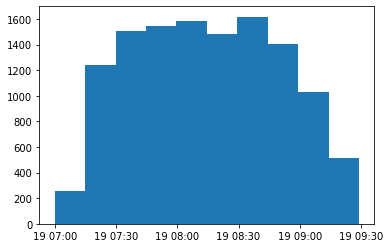

In [22]:
plt.hist(df_res_T_Centralen["ExpectedDateTime"][df_res_T_Centralen["ExpectedDateTime"]<datetime(2023,4,19,10)])

In [31]:
df_arrive_estimated = df_res_T_Centralen.sort_values("RequestTime").groupby("JourneyNumber").last()

In [33]:
df_arrive_estimated[df_arrive_estimated["ExpectedDateTime"]!=df_arrive_estimated["TimeTabledDateTime"]]

,GroupOfLine,TransportMode,LineNumber,Destination,JourneyDirection,StopAreaName,StopAreaNumber,StopPointNumber,StopPointDesignation,TimeTabledDateTime,ExpectedDateTime,DisplayTime,Deviations,RequestTime,Station
JourneyNumber,,,,,,,,,,,,,,,
10117.0,tunnelbanans gröna linje,METRO,19.0,Hagsätra,2.0,T-Centralen,1051.0,1052.0,4,2023-04-19 08:19:30,2023-04-19 08:19:44,Nu,None,2023-04-19 08:19:36.310759,T-Centralen
10118.0,tunnelbanans gröna linje,METRO,17.0,Skarpnäck,2.0,T-Centralen,1051.0,1052.0,4,2023-04-19 08:34:00,2023-04-19 08:34:02,Nu,None,2023-04-19 08:34:03.552835,T-Centralen
10119.0,tunnelbanans gröna linje,METRO,19.0,Hagsätra,2.0,T-Centralen,1051.0,1052.0,4,2023-04-19 08:38:30,2023-04-19 08:38:51,Nu,None,2023-04-19 08:39:27.656491,T-Centralen
10120.0,tunnelbanans gröna linje,METRO,18.0,Farsta strand,2.0,T-Centralen,1051.0,1052.0,4,2023-04-19 08:45:00,2023-04-19 08:45:04,5 min,None,2023-04-19 08:39:27.656491,T-Centralen
10337.0,tunnelbanans gröna linje,METRO,18.0,Hässelby strand,1.0,T-Centralen,1051.0,2051.0,1,2023-04-19 08:55:00,2023-04-19 08:58:01,Nu,None,2023-04-19 08:58:03.374866,T-Centralen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38736.0,tunnelbanans blå linje,METRO,10,Kungsträdgården,2.0,T-Centralen,1051.0,3052.0,6,2023-04-19 07:55:17,2023-04-19 07:55:58,Nu,None,2023-04-19 07:56:44.026267,T-Centralen
38737.0,tunnelbanans blå linje,METRO,10,Kungsträdgården,2.0,T-Centralen,1051.0,3052.0,6,2023-04-19 08:08:13,2023-04-19 08:13:09,Nu,None,2023-04-19 08:13:08.934455,T-Centralen
38741.0,tunnelbanans blå linje,METRO,10.0,Kungsträdgården,2.0,T-Centralen,1051.0,3052.0,6,2023-04-19 08:20:55,2023-04-19 08:23:47,Nu,None,2023-04-19 08:24:42.914083,T-Centralen


In [ ]:
df_arrive_estimated[df_arrive_estimated["ExpectedDateTime"]!=df_arrive_estimated["TimeTabledDateTime"]]

In [47]:
df_delay = df_arrive_estimated[df_arrive_estimated["ExpectedDateTime"]!=df_arrive_estimated["TimeTabledDateTime"]]


In [62]:
df_res_T_Centralen["Delay"] = (df_res_T_Centralen["ExpectedDateTime"]-df_res_T_Centralen["TimeTabledDateTime"]).dt.total_seconds()

C:\Users\VIANEY~1\AppData\Local\Temp/ipykernel_5084/2654815051.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_res_T_Centralen["Delay"] = (df_res_T_Centralen["ExpectedDateTime"]-df_res_T_Centralen["TimeTabledDateTime"]).dt.total_seconds()


(array([3.476e+03, 3.050e+02, 3.700e+01, 2.300e+01, 0.000e+00, 0.000e+00,
        5.000e+00, 2.000e+00, 3.000e+00, 3.800e+01]),
 array([  1. ,  90.3, 179.6, 268.9, 358.2, 447.5, 536.8, 626.1, 715.4,
        804.7, 894. ]),
 <BarContainer object of 10 artists>)

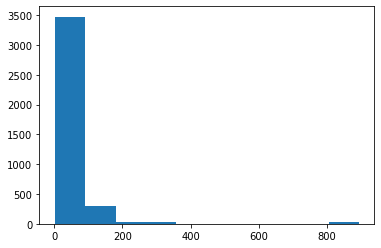

In [64]:
plt.hist(df_res_T_Centralen[df_res_T_Centralen["Delay"]>0]["Delay"])

In [46]:
np.sort(df_res_T_Centralen[df_res_T_Centralen["ExpectedDateTime"]<datetime(2023,4,19,10)]["RequestTime"].unique())[-40:-20]

array(['2023-04-19 08:33:33.545361', '2023-04-19 08:34:03.552835',
       '2023-04-19 08:34:30.892407', '2023-04-19 08:34:57.909918',
       '2023-04-19 08:35:22.191057', '2023-04-19 08:35:54.142721',
       '2023-04-19 08:36:17.638705', '2023-04-19 08:37:15.152194',
       '2023-04-19 08:37:43.484358', '2023-04-19 08:38:09.325064',
       '2023-04-19 08:38:34.501689', '2023-04-19 08:39:02.580596',
       '2023-04-19 08:39:27.656491', '2023-04-19 08:46:19.100830',
       '2023-04-19 08:46:47.875612', '2023-04-19 08:47:13.685137',
       '2023-04-19 08:47:36.722778', '2023-04-19 08:48:06.631918',
       '2023-04-19 08:48:56.380470', '2023-04-19 08:49:46.351353'],
      dtype=object)

In [66]:
df_res_T_Centralen = df_res_T_Centralen[df_res_T_Centralen["TimeTabledDateTime"]<datetime(2023,4,19,9)]
df_res_T_Centralen

,GroupOfLine,TransportMode,LineNumber,Destination,JourneyDirection,StopAreaName,StopAreaNumber,StopPointNumber,StopPointDesignation,TimeTabledDateTime,ExpectedDateTime,DisplayTime,JourneyNumber,Deviations,RequestTime,Station,Delay
0,tunnelbanans blå linje,METRO,11.0,Kungsträdgården,2.0,T-Centralen,1051.0,3052.0,6,2023-04-19 08:15:00,2023-04-19 08:15:00,08:15,30019.0,NaN,2023-04-19 08:15:40.685617,T-Centralen,0.0
1,tunnelbanans gröna linje,METRO,17.0,Åkeshov,1.0,T-Centralen,1051.0,2051.0,1,2023-04-19 08:15:00,2023-04-19 08:15:14,Nu,11005.0,NaN,2023-04-19 08:15:40.685617,T-Centralen,14.0
2,tunnelbanans blå linje,METRO,10.0,Hjulsta,1.0,T-Centralen,1051.0,3051.0,5,2023-04-19 08:15:30,2023-04-19 08:15:30,08:15,30325.0,NaN,2023-04-19 08:15:40.685617,T-Centralen,0.0
3,tunnelbanans röda linje,METRO,14.0,Fruängen,2.0,T-Centralen,1051.0,2052.0,2,2023-04-19 08:16:00,2023-04-19 08:16:26,Nu,20410.0,NaN,2023-04-19 08:15:40.685617,T-Centralen,26.0
4,tunnelbanans röda linje,METRO,13.0,Ropsten,1.0,T-Centralen,1051.0,1051.0,3,2023-04-19 08:16:30,2023-04-19 08:16:30,Nu,20652.0,NaN,2023-04-19 08:15:40.685617,T-Centralen,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45644,tunnelbanans gröna linje,METRO,18,Alvik,1.0,T-Centralen,1051.0,2051.0,1,2023-04-19 08:41:00,2023-04-19 08:41:00,27 min,10335.0,NaN,2023-04-19 08:13:08.934455,T-Centralen,0.0
45645,tunnelbanans röda linje,METRO,14,Fruängen,2.0,T-Centralen,1051.0,2052.0,2,2023-04-19 08:41:00,2023-04-19 08:41:00,08:41,20415.0,NaN,2023-04-19 08:13:08.934455,T-Centralen,0.0
45646,tunnelbanans röda linje,METRO,13,Ropsten,1.0,T-Centralen,1051.0,1051.0,3,2023-04-19 08:41:30,2023-04-19 08:41:31,28 min,20008.0,NaN,2023-04-19 08:13:08.934455,T-Centralen,1.0
45647,tunnelbanans gröna linje,METRO,19,Vällingby,1.0,T-Centralen,1051.0,2051.0,1,2023-04-19 08:43:00,2023-04-19 08:43:00,29 min,10552.0,NaN,2023-04-19 08:13:08.934455,T-Centralen,0.0


# One day analysis

## Preliminary

In [4]:
df_res = pd.read_csv('data/data_collection_2023-05-03.csv')

In [5]:
df_res["MissingExpected"] = 0
df_res.loc[df_res["ExpectedDateTime"].isna(),"MissingExpected"] = 1
df_res.loc[df_res["ExpectedDateTime"].isna(),"ExpectedDateTime"] = df_res.loc[df_res["ExpectedDateTime"].isna(),"TimeTabledDateTime"]

In [6]:
df_res = df_res[~df_res["TimeTabledDateTime"].isna()]

In [7]:
df_res["ExpectedDateTime"] = df_res["ExpectedDateTime"].apply(lambda x: datetime.strptime(x,'%Y-%m-%dT%H:%M:%S'))
df_res["TimeTabledDateTime"] = df_res["TimeTabledDateTime"].apply(lambda x: datetime.strptime(x,'%Y-%m-%dT%H:%M:%S'))
df_res["RequestTime"] = df_res["RequestTime"].apply(lambda x: datetime.strptime(x.split('.')[0],'%Y-%m-%d %H:%M:%S'))

In [8]:
df_res["Delay"] = (df_res["ExpectedDateTime"]-df_res["TimeTabledDateTime"]).dt.total_seconds()

In [9]:
df_res["Station"].unique()

array(['T-Centralen', 'Tekniska högskolan', 'Solna Centrum', 'Solna Bus',
       'Friedhemsplan', 'Globen', 'Bergshamra', 'Bergshamra bus'],
      dtype=object)

In [10]:
df_res.loc[df_res["Station"]=="Bergshamra bus","Station"]="Bergshamra"
df_res.loc[df_res["Station"]=="Friedhemsplan","Station"]="Fridhemsplan"
df_res.loc[df_res["Station"]=="Solna Bus","Station"]="Solna Centrum"

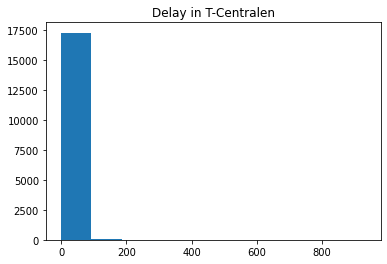

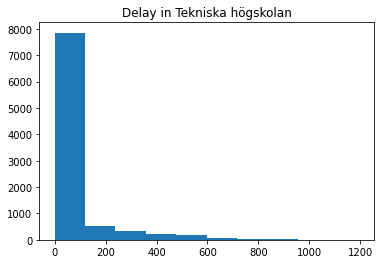

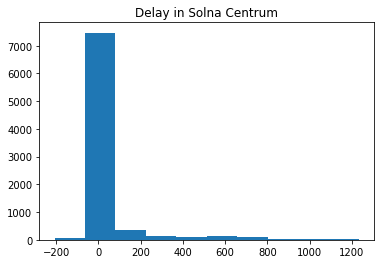

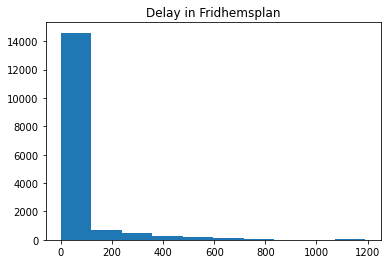

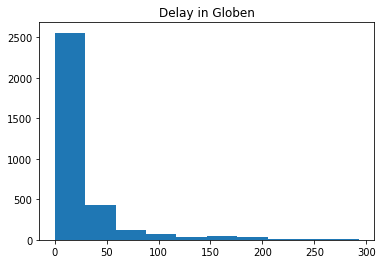

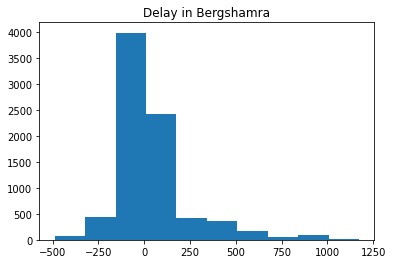

In [11]:
for stattion in df_res.Station.unique():
    plt.figure()
    df_station = df_res[df_res["Station"]==stattion]
    plt.hist(df_station["Delay"])
    plt.title("Delay in "+stattion)
    plt.show()

(array([  215.,   439., 28035.,  1549.,   818.,   534.,   261.,    74.,
           72.,    47.]),
 array([-319. , -162.2,   -5.4,  151.4,  308.2,  465. ,  621.8,  778.6,
         935.4, 1092.2, 1249. ]),
 <BarContainer object of 10 artists>)

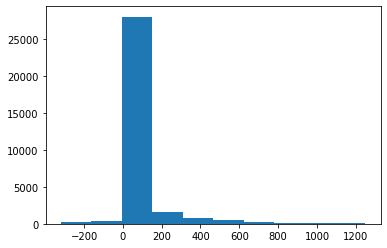

In [11]:
plt.hist(df_res[df_res["TransportMode"]=="BUS"]["Delay"])

## Adding real time

In [11]:
df_res["RealDepartureTime"] = pd.to_datetime('0', format='%Y%m', errors='coerce')
for station in df_res["Station"].unique():
    for Journey_n in df_res[(df_res["Station"]==station)]["JourneyNumber"].unique():
        for line in df_res[(df_res["Station"]==station)&(df_res["JourneyNumber"]==Journey_n)]["LineNumber"].unique():
            real_time = df_res[(df_res["Station"]==station)&(df_res["JourneyNumber"]==Journey_n)&(df_res["LineNumber"]==line)].sort_values(by="RequestTime", ascending = False).head(1)["ExpectedDateTime"].values[0]
            df_res.loc[(df_res["Station"]==station)&(df_res["JourneyNumber"]==Journey_n)&(df_res["LineNumber"]==line),"RealDepartureTime"] = real_time

In [12]:
df_res

,GroupOfLine,TransportMode,LineNumber,Destination,JourneyDirection,StopAreaName,StopAreaNumber,StopPointNumber,StopPointDesignation,TimeTabledDateTime,ExpectedDateTime,DisplayTime,JourneyNumber,Deviations,RequestTime,Station,MissingExpected,Delay,RealDepartureTime
0,tunnelbanans röda linje,METRO,14,Mörby centrum,1,T-Centralen,1051,1051,3,2023-05-03 15:59:00,2023-05-03 15:59:57,Nu,20143,NaN,2023-05-03 16:00:04,T-Centralen,0,57.0,2023-05-03 15:59:57
1,tunnelbanans blå linje,METRO,10,Kungsträdgården,2,T-Centralen,1051,3052,6,2023-05-03 16:00:00,2023-05-03 16:00:00,Nu,30244,NaN,2023-05-03 16:00:04,T-Centralen,0,0.0,2023-05-03 16:00:00
2,tunnelbanans gröna linje,METRO,17,Åkeshov,1,T-Centralen,1051,2051,1,2023-05-03 16:00:00,2023-05-03 16:00:00,Nu,11054,NaN,2023-05-03 16:00:04,T-Centralen,0,0.0,2023-05-03 16:00:00
3,tunnelbanans gröna linje,METRO,19,Hagsätra,2,T-Centralen,1051,1052,4,2023-05-03 16:00:30,2023-05-03 16:00:30,Nu,11159,NaN,2023-05-03 16:00:04,T-Centralen,0,0.0,2023-05-03 16:00:30
4,tunnelbanans blå linje,METRO,11,Akalla,1,T-Centralen,1051,3051,5,2023-05-03 16:00:30,2023-05-03 16:00:30,Nu,30503,NaN,2023-05-03 16:00:04,T-Centralen,0,0.0,2023-05-03 16:00:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62953,NaN,BUS,156,Danderyds sjukhus,2,Bergshamra bro,50388,50389,NaN,2023-05-03 18:17:02,2023-05-03 18:15:49,15 min,22714,NaN,2023-05-03 18:00:00,Bergshamra,0,-73.0,2023-05-03 18:15:49
62954,blåbuss,BUS,177,Skärvik,2,Bergshamra bro,50388,50388,NaN,2023-05-03 18:15:49,2023-05-03 18:15:58,15 min,10232,"[{'Text': 'Förseningar pga bilköer', 'Conseque...",2023-05-03 18:00:00,Bergshamra,0,9.0,2023-05-03 18:15:58
62955,blåbuss,BUS,177,Mörby station,1,Bergshamra bro,50388,50389,NaN,2023-05-03 18:19:48,2023-05-03 18:16:54,16 min,10227,"[{'Text': 'Förseningar pga bilköer', 'Conseque...",2023-05-03 18:00:00,Bergshamra,0,-174.0,2023-05-03 18:16:54
62956,NaN,BUS,157,Lunda industri,2,Bergshamra bro,50388,50388,NaN,2023-05-03 18:19:49,2023-05-03 18:19:49,18:19,20180,NaN,2023-05-03 18:00:00,Bergshamra,0,0.0,2023-05-03 18:19:49


## Journey construction

In [14]:
def valid_hour(x):
    return x.hour in [6,7,8,15,16,17]

In [15]:
df_journey = pd.DataFrame({column:pd.Series(dtype=typ) for column,typ in zip(["Line","JourneyNumber","DepartureStation","ArrivalStation","ExpectedDepartureTime","ExpectedArrivalTime","RealDepartureTime","RealArrivalTime"],["int","int","str","str","<M8[ns]","<M8[ns]","<M8[ns]","<M8[ns]"])})
df_journey

,Line,JourneyNumber,DepartureStation,ArrivalStation,ExpectedDepartureTime,ExpectedArrivalTime,RealDepartureTime,RealArrivalTime


In [16]:
df_journey = pd.DataFrame({column:pd.Series(dtype=typ) for column,typ in zip(["Line","JourneyNumber","DepartureStation","ArrivalStation","ExpectedDepartureTime","ExpectedArrivalTime","RealDepartureTime","RealArrivalTime"],["int","int","str","str","<M8[ns]","<M8[ns]","<M8[ns]","<M8[ns]"])})

for i in range(df_res["Station"].nunique()):
    departure_station = df_res["Station"].unique()[i]
    for j in range(i+1,df_res["Station"].nunique()):
        arrival_station = df_res["Station"].unique()[j]
        dep_idx = df_res[(df_res["Station"]==departure_station)&(df_res["RealDepartureTime"].apply(valid_hour))]["JourneyNumber"].unique()
        journey_nums = df_res[(df_res["Station"]==arrival_station)&(df_res["RealDepartureTime"].apply(valid_hour))&(df_res["JourneyNumber"].isin(dep_idx))]["JourneyNumber"].unique()
        journey_nums = journey_nums.astype(int)

        for journey_num in journey_nums:
            dep = df_res[(df_res["Station"]==departure_station)&(df_res["JourneyNumber"]==journey_num)]
            arr = df_res[(df_res["Station"]==arrival_station)&(df_res["JourneyNumber"]==journey_num)]
            line_dep = (dep["LineNumber"].unique()[0])
            line_arr = (arr["LineNumber"].unique()[0])
            exp_dep_time = dep["TimeTabledDateTime"].unique()[0]
            exp_arr_time = arr["TimeTabledDateTime"].unique()[0]
            real_dep_time = dep["RealDepartureTime"].unique()[0]
            real_arr_time = arr["RealDepartureTime"].unique()[0]
            if(line_dep==line_arr):
                if(exp_dep_time<exp_arr_time):
                    new_df = pd.DataFrame([[line_dep,journey_num,departure_station,arrival_station,exp_dep_time,exp_arr_time,real_dep_time,real_arr_time]], columns = df_journey.columns)
                else:
                    new_df = pd.DataFrame([[line_dep,journey_num,arrival_station,departure_station,exp_arr_time,exp_dep_time,real_arr_time,real_dep_time]], columns = df_journey.columns)
                df_journey = pd.concat([df_journey,new_df], ignore_index=True)

In [17]:
df_journey["Line"] = df_journey["Line"].astype(int)
df_journey["JourneyNumber"] = df_journey["JourneyNumber"].astype(int)

In [18]:
df_journey["Line"].unique()

array([ 14,  11,  18,  10,  19,  17,   4,  30, 177, 176])

In [18]:
for col in df_journey.columns:
    print(col,":",df_journey[col].dtype)

Line : int32
JourneyNumber : int32
DepartureStation : object
ArrivalStation : object
ExpectedDepartureTime : datetime64[ns]
ExpectedArrivalTime : datetime64[ns]
RealDepartureTime : datetime64[ns]
RealArrivalTime : datetime64[ns]


In [19]:
df_journey

,Line,JourneyNumber,DepartureStation,ArrivalStation,ExpectedDepartureTime,ExpectedArrivalTime,RealDepartureTime,RealArrivalTime
0,14,20505,Tekniska högskolan,T-Centralen,2023-05-03 16:04:30,2023-05-03 16:11:00,2023-05-03 16:04:30,2023-05-03 16:11:00
1,14,20143,T-Centralen,Tekniska högskolan,2023-05-03 15:59:00,2023-05-03 16:05:00,2023-05-03 15:59:57,2023-05-03 16:05:46
2,14,20506,Tekniska högskolan,T-Centralen,2023-05-03 16:09:30,2023-05-03 16:16:00,2023-05-03 16:09:30,2023-05-03 16:16:00
3,14,20963,T-Centralen,Tekniska högskolan,2023-05-03 16:04:00,2023-05-03 16:10:00,2023-05-03 16:04:00,2023-05-03 16:10:00
4,14,20507,Tekniska högskolan,T-Centralen,2023-05-03 16:14:30,2023-05-03 16:21:00,2023-05-03 16:14:43,2023-05-03 16:21:00
...,...,...,...,...,...,...,...,...
518,19,10751,Fridhemsplan,Globen,2023-05-03 17:16:30,2023-05-03 17:36:45,2023-05-03 17:16:33,2023-05-03 17:36:45
519,19,10614,Globen,Fridhemsplan,2023-05-03 17:40:30,2023-05-03 17:59:30,2023-05-03 17:40:30,2023-05-03 17:59:30
520,19,11166,Fridhemsplan,Globen,2023-05-03 17:23:00,2023-05-03 17:43:15,2023-05-03 17:23:00,2023-05-03 17:43:15
521,19,10753,Fridhemsplan,Globen,2023-05-03 17:27:00,2023-05-03 17:47:15,2023-05-03 17:27:38,2023-05-03 17:48:39


## Compute delay before departure

In [142]:
df_delay_before = pd.DataFrame(columns=np.concatenate([["Line","JourneyNumber","DepartureStation","ArrivalStation"],time_arr]))

for idx in tqdm(df_journey.index):
    journey_info = df_journey.loc[idx]
    line = str(journey_info["Line"])
    j_number = journey_info["JourneyNumber"]
    dep_station = journey_info["DepartureStation"]
    arr_station = journey_info["ArrivalStation"]
    df_temp = df_res[(df_res["Station"]==dep_station)&(df_res["LineNumber"]==line)&(df_res["JourneyNumber"]==j_number)].sort_values("RequestTime",ascending = False).copy()
    df_temp["Time Gap"] = (df_temp["ExpectedDateTime"]-df_temp["RequestTime"]).dt.total_seconds()
    df_temp["Future Delay"] = (df_temp["RealDepartureTime"]-df_temp["ExpectedDateTime"]).dt.total_seconds()
    df_add=pd.DataFrame([np.concatenate([[line,j_number,dep_station,arr_station],np.nan*np.ones_like(time_arr,int)])],columns=np.concatenate([["Line","JourneyNumber","DepartureStation","ArrivalStation"],time_arr]))
    for time_value in time_arr:
        vals = df_temp[df_temp["Time Gap"]>=time_value]["Future Delay"].values
        if (len(vals)>0):
            df_add[str(time_value)] = int(vals[0])
    df_delay_before = pd.concat([df_delay_before,df_add],ignore_index=True)
df_delay_before = df_delay_before.replace({"nan":np.nan})

100%|██████████| 523/523 [00:32<00:00, 16.00it/s]


## Transfers

In [20]:
dico_transfer = {}
for station in df_journey["DepartureStation"].unique():
    dico_station = {}
    list_lines = df_journey[df_journey["DepartureStation"]==station]["Line"].unique()
    for i in range(len(list_lines)):
            dico_station[list_lines[i]] = {}
    for i in range(len(list_lines)):
        for j in range(i+1,len(list_lines)):
            dico_station[list_lines[i]][list_lines[j]] = ""
            dico_station[list_lines[j]][list_lines[i]] = ""
    dico_transfer[station] = dico_station

In [21]:
dico_transfer = {'Tekniska högskolan': {'14': {'4': 3}, '4': {'14': 5}},
                 'T-Centralen': {'14': {'11': 3, '10': 3, '17': 2, '18': 2, '19': 2},
                                 '11': {'14': 4, '10': 0, '17': 3, '18': 3, '19': 3},
                                 '10': {'14': 4, '11': 0, '17': 3, '18': 3, '19': 3},
                                 '17': {'14': 1, '11': 3, '10': 3, '18': 0, '19': 0},
                                 '18': {'14': 1, '11': 3, '10': 3, '17': 0, '19': 0},
                                 '19': {'14': 1, '11': 3, '10': 3, '17': 0, '18': 0}},
                 'Solna Centrum': {'11': {'30': 3, '177': 5, '176': 5},
                                   '30': {'11': 3, '177': 8, '176': 8},
                                   '177': {'11': 3, '30': 3, '176': 0},
                                   '176': {'11': 3, '30': 3, '177': 0}}, #5 for Solna centrum norra->Solna centrum & 3 for Solna station->Solna centrum
                 'Fridhemsplan': {'18': {'10': 3, '19': 0, '11': 3, '17': 0, '4': ''},
                                   '10': {'18': 3, '19': 3, '11': 3, '17': 3, '4': ''},
                                   '19': {'18': 0, '10': 3, '11': 3, '17': 0, '4': ''},
                                   '11': {'18': 3, '10': 0, '19': 3, '17': 3, '4': ''},
                                   '17': {'18': 0, '10': 3, '19': 0, '11': 3, '4': ''},
                                   '4': {'18': '', '10': '', '19': '', '11': '', '17': ''}},
                 'Globen': {'19': {'30': ''}, '30': {'19': ''}},
                 'Bergshamra': {'14': {'177': 5, '176': 5},
                                '177': {'14': 5, '176': 0},
                                '176': {'14': 5, '177': 0}}}


## Itinerary lists

In [22]:
journey_single =[["Tekniska högskolan","Fridhemsplan"],["Tekniska högskolan", "Solna Centrum"],["Globen", "Solna Centrum"]]
journey = np.concatenate([[[a[0],a[1]],[a[1],a[0]]] for a in (journey_single)],axis=0)

In [23]:
df_reach = pd.DataFrame(columns=["Origin","Destination","Lines"])

for dep_station in df_journey["DepartureStation"].unique():
    for arr_station in df_journey[df_journey["DepartureStation"]==dep_station]["ArrivalStation"].unique():
        lines = df_journey[(df_journey["DepartureStation"]==dep_station)&(df_journey["ArrivalStation"]==arr_station)]["Line"].unique().astype(int)
        new_df = pd.DataFrame([[dep_station,arr_station,lines]],columns=["Origin","Destination","Lines"])
        df_reach = pd.concat([df_reach,new_df], ignore_index=True)

In [24]:
df_reach

,Origin,Destination,Lines
0,Tekniska högskolan,T-Centralen,[14]
1,Tekniska högskolan,Fridhemsplan,[4]
2,Tekniska högskolan,Bergshamra,[14]
3,T-Centralen,Tekniska högskolan,[14]
4,T-Centralen,Solna Centrum,[11]
5,T-Centralen,Fridhemsplan,"[11, 10, 17, 18, 19]"
6,T-Centralen,Globen,[19]
7,T-Centralen,Bergshamra,[14]
8,Solna Centrum,T-Centralen,[11]
9,Solna Centrum,Fridhemsplan,[11]


In [25]:
df_reach.to_csv("data/itinerary.csv",index=False)

In [227]:
for jour in journey:
    print("Proposition to go from "+jour[0]+" to "+jour[1]+":")
    temp_df = df_reach[(df_reach["Origin"]==jour[0])&(df_reach["Destination"]==jour[1])]
    if (len(temp_df)>0):
        print("- Direct with line(s) ",temp_df["Lines"].values[0])
    list_dep = df_reach[(df_reach["Origin"]==jour[0])]["Destination"].unique()
    list_arr = df_reach[(df_reach["Destination"]==jour[1])]["Origin"].unique()
    inter_stations = [a for a in list_dep if a in list_arr]
    for inter_station in inter_stations:
        line_1 = df_reach[(df_reach["Origin"]==jour[0])&(df_reach["Destination"]==inter_station)]["Lines"].values[0]
        line_2 = df_reach[(df_reach["Destination"]==jour[1])&(df_reach["Origin"]==inter_station)]["Lines"].values[0]
        print("- Via "+inter_station+", with line(s)",line_1," and in "+inter_station+" line(s)",line_2)

Proposition to go from Tekniska högskolan to Friedhemsplan:
- Direct with line(s)  [4]
- Via T-Centralen, with line(s) [14]  and in T-Centralen line(s) [11 10 17 18 19]
Proposition to go from Friedhemsplan to Tekniska högskolan:
- Direct with line(s)  [4]
- Via T-Centralen, with line(s) [18 10 19 11 17]  and in T-Centralen line(s) [14]
Proposition to go from Tekniska högskolan to Solna Centrum:
- Via T-Centralen, with line(s) [14]  and in T-Centralen line(s) [11]
- Via Friedhemsplan, with line(s) [4]  and in Friedhemsplan line(s) [11]
- Via Bergshamra, with line(s) [14]  and in Bergshamra line(s) [177 176]
Proposition to go from Solna Centrum to Tekniska högskolan:
- Via T-Centralen, with line(s) [11]  and in T-Centralen line(s) [14]
- Via Friedhemsplan, with line(s) [11]  and in Friedhemsplan line(s) [4]
- Via Bergshamra, with line(s) [177 176]  and in Bergshamra line(s) [14]
Proposition to go from Globen to Solna Centrum:
- Direct with line(s)  [30]
- Via T-Centralen, with line(s) [1

# One journey analysis

(-30.0, 1173.0)

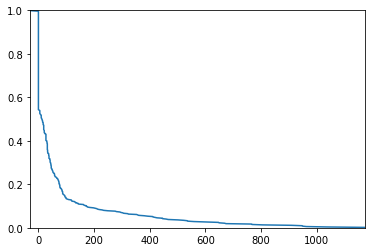

In [246]:
val = np.sort((df_journey["RealArrivalTime"]-df_journey["ExpectedArrivalTime"]).dt.total_seconds())
plt.plot(val,1-np.arange(len(val))/len(val))
plt.ylim(0,1)
plt.xlim(val[0],val[-1])

In [254]:
df_journey

,Line,JourneyNumber,DepartureStation,ArrivalStation,ExpectedDepartureTime,ExpectedArrivalTime,RealDepartureTime,RealArrivalTime
0,14,20505,Tekniska högskolan,T-Centralen,2023-05-03 16:04:30,2023-05-03 16:11:00,2023-05-03 16:04:30,2023-05-03 16:11:00
1,14,20143,T-Centralen,Tekniska högskolan,2023-05-03 15:59:00,2023-05-03 16:05:00,2023-05-03 15:59:57,2023-05-03 16:05:46
2,14,20506,Tekniska högskolan,T-Centralen,2023-05-03 16:09:30,2023-05-03 16:16:00,2023-05-03 16:09:30,2023-05-03 16:16:00
3,14,20963,T-Centralen,Tekniska högskolan,2023-05-03 16:04:00,2023-05-03 16:10:00,2023-05-03 16:04:00,2023-05-03 16:10:00
4,14,20507,Tekniska högskolan,T-Centralen,2023-05-03 16:14:30,2023-05-03 16:21:00,2023-05-03 16:14:43,2023-05-03 16:21:00
...,...,...,...,...,...,...,...,...
518,19,10751,Friedhemsplan,Globen,2023-05-03 17:16:30,2023-05-03 17:36:45,2023-05-03 17:16:33,2023-05-03 17:36:45
519,19,10614,Globen,Friedhemsplan,2023-05-03 17:40:30,2023-05-03 17:59:30,2023-05-03 17:40:30,2023-05-03 17:59:30
520,19,11166,Friedhemsplan,Globen,2023-05-03 17:23:00,2023-05-03 17:43:15,2023-05-03 17:23:00,2023-05-03 17:43:15
521,19,10753,Friedhemsplan,Globen,2023-05-03 17:27:00,2023-05-03 17:47:15,2023-05-03 17:27:38,2023-05-03 17:48:39


In [143]:
df_delay_before

,Line,JourneyNumber,DepartureStation,ArrivalStation,0,20,40,60,80,100,...,1020,1040,1060,1080,1100,1120,1140,1160,1180,1200
0,14,20505,Tekniska högskolan,T-Centralen,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14,20143,T-Centralen,Tekniska högskolan,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14,20506,Tekniska högskolan,T-Centralen,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14,20963,T-Centralen,Tekniska högskolan,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14,20507,Tekniska högskolan,T-Centralen,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,19,10751,Fridhemsplan,Globen,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,NaN
519,19,10614,Globen,Fridhemsplan,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
520,19,11166,Fridhemsplan,Globen,-4.0,0.0,0.0,-4.0,-4.0,0.0,...,0.0,0.0,-4.0,-4.0,-4.0,-4.0,0.0,0.0,NaN,NaN
521,19,10753,Fridhemsplan,Globen,0.0,0.0,0.0,0.0,0.0,0.0,...,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,NaN


# Concatenate all on all data

In [431]:
df = pd.DataFrame()
list_file = listdir('data')
lines_interest = np.array(['14', '4', '11', '10', '17', '18', '19', '30', '177', '176'])

for i in tqdm(range(len(list_file))):
    file = list_file[i]
    if ('data_collection_2023' in file):
        df_work = pd.read_csv('data/'+file)
        df_work["LineNumber"] = df_work["LineNumber"].astype(str)
        df_work = df_work[df_work["LineNumber"].isin(lines_interest)]
        df_work["Day"] = i
        df_work["MissingExpected"] = 0
        df_work.loc[df_work["ExpectedDateTime"].isna(),"MissingExpected"] = 1
        df_work.loc[df_work["ExpectedDateTime"].isna(),"ExpectedDateTime"] = df_work.loc[df_work["ExpectedDateTime"].isna(),"TimeTabledDateTime"]
        df_work = df_work[~df_work["TimeTabledDateTime"].isna()]
        df_work["ExpectedDateTime"] = df_work["ExpectedDateTime"].apply(lambda x: datetime.strptime(x,'%Y-%m-%dT%H:%M:%S'))
        df_work["TimeTabledDateTime"] = df_work["TimeTabledDateTime"].apply(lambda x: datetime.strptime(x,'%Y-%m-%dT%H:%M:%S'))
        df_work["Delay"] = (df_work["ExpectedDateTime"]-df_work["TimeTabledDateTime"]).dt.total_seconds()
        df_work["RealDepartureTime"] = pd.to_datetime('0', format='%Y%m', errors='coerce')
        stations = df_work["Station"].unique()
        for station in stations:
            journey_numbers = df_work["JourneyNumber"][(df_work["Station"]==station)].unique() 
            for Journey_n in journey_numbers:
                lines = df_work["LineNumber"][(df_work["Station"]==station)&(df_work["JourneyNumber"]==Journey_n)].unique()
                for line in lines:
                    real_time = df_work[(df_work["Station"]==station)&(df_work["JourneyNumber"]==Journey_n)&(df_work["LineNumber"]==line)].sort_values(by="RequestTime", ascending = False).head(1)["ExpectedDateTime"].values[0]
                    df_work.loc[(df_work["Station"]==station)&(df_work["JourneyNumber"]==Journey_n)&(df_work["LineNumber"]==line),"RealDepartureTime"] = real_time
        df = pd.concat([df,df_work], ignore_index=True)

  5%|▍         | 1/21 [00:00<00:03,  5.18it/s]C:\Users\VIANEY~1\AppData\Local\Temp/ipykernel_22936/324289930.py:8: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_work = pd.read_csv('data/'+file)
 10%|▉         | 2/21 [00:28<05:12, 16.45s/it]C:\Users\VIANEY~1\AppData\Local\Temp/ipykernel_22936/324289930.py:8: DtypeWarning: Columns (2,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df_work = pd.read_csv('data/'+file)
 14%|█▍        | 3/21 [00:42<04:41, 15.67s/it]C:\Users\VIANEY~1\AppData\Local\Temp/ipykernel_22936/324289930.py:8: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_work = pd.read_csv('data/'+file)
 29%|██▊       | 6/21 [01:52<04:24, 17.66s/it]C:\Users\VIANEY~1\AppData\Local\Temp/ipykernel_22936/324289930.py:8: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_work = pd.read_csv

In [432]:
df.to_csv("data/combined_data_clean.csv")

In [6]:
df = pd.read_csv("data/combined_data_clean.csv")
df["RealDepartureTime"] = df["RealDepartureTime"].apply(lambda x :datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
df["TimeTabledDateTime"] = df["TimeTabledDateTime"].apply(lambda x :datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))


In [10]:
df

,Unnamed: 0,GroupOfLine,TransportMode,LineNumber,Destination,JourneyDirection,StopAreaName,StopAreaNumber,StopPointNumber,StopPointDesignation,...,ExpectedDateTime,DisplayTime,JourneyNumber,Deviations,RequestTime,Station,Day,MissingExpected,Delay,RealDepartureTime
0,0,tunnelbanans blå linje,METRO,10,Kungsträdgården,2.0,T-Centralen,1051.0,3052.0,6,...,2023-04-17 11:14:13,Nu,30212.0,NaN,2023-04-17 11:14:21.041049,T-Centralen,0,0,133.0,2023-04-17 11:14:13
1,1,tunnelbanans gröna linje,METRO,18,Farsta strand,2.0,T-Centralen,1051.0,1052.0,4,...,2023-04-17 11:14:30,Nu,10134.0,NaN,2023-04-17 11:14:21.041049,T-Centralen,0,0,0.0,2023-04-17 11:14:30
2,2,tunnelbanans blå linje,METRO,10,Hjulsta,1.0,T-Centralen,1051.0,3051.0,5,...,2023-04-17 11:15:30,1 min,30347.0,NaN,2023-04-17 11:14:21.041049,T-Centralen,0,0,0.0,2023-04-17 11:15:30
3,3,tunnelbanans gröna linje,METRO,19,Hässelby strand,1.0,T-Centralen,1051.0,2051.0,1,...,2023-04-17 11:16:32,2 min,10569.0,NaN,2023-04-17 11:14:21.041049,T-Centralen,0,0,2.0,2023-04-17 11:16:32
4,4,tunnelbanans röda linje,METRO,14,Liljeholmen,2.0,T-Centralen,1051.0,2052.0,2,...,2023-04-17 11:16:54,2 min,20446.0,NaN,2023-04-17 11:14:21.041049,T-Centralen,0,0,24.0,2023-04-17 11:16:54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171470,1171470,blåbuss,BUS,177,Brommaplan,2.0,Bergshamra bro,50388.0,50388.0,NaN,...,2023-05-09 09:03:42,3 min,10176.0,"[{'Text': 'Förseningar pga bilköer', 'Conseque...",2023-05-09 08:59:49.609972,Bergshamra bus,18,0,23.0,2023-05-09 09:03:42
1171471,1171471,blåbuss,BUS,176,Stenhamra,2.0,Bergshamra bro,50388.0,50388.0,NaN,...,2023-05-09 09:09:04,9 min,10026.0,"[{'Text': 'Förseningar pga bilköer', 'Conseque...",2023-05-09 08:59:49.609972,Bergshamra bus,18,0,0.0,2023-05-09 09:09:04
1171472,1171472,blåbuss,BUS,176,Mörby station,1.0,Bergshamra bro,50388.0,50389.0,NaN,...,2023-05-09 09:11:40,11 min,10019.0,"[{'Text': 'Förseningar pga bilköer', 'Conseque...",2023-05-09 08:59:49.609972,Bergshamra bus,18,0,-43.0,2023-05-09 09:11:40
1171473,1171473,blåbuss,BUS,177,Mörby station,1.0,Bergshamra bro,50388.0,50389.0,NaN,...,2023-05-09 09:12:29,12 min,10170.0,"[{'Text': 'Förseningar pga bilköer', 'Conseque...",2023-05-09 08:59:49.609972,Bergshamra bus,18,0,701.0,2023-05-09 09:12:29


In [13]:
df.loc[df["Station"]=="Bergshamra bus","Station"]="Bergshamra"
df.loc[df["Station"]=="Friedhemsplan","Station"]="Fridhemsplan"
df.loc[df["Station"]=="Solna Bus","Station"]="Solna Centrum"

In [14]:
df.to_csv("data/combined_data_clean_v2.csv")

In [16]:
df_reach = pd.read_csv("data/itinerary.csv")

In [17]:
def valid_hour(x):
    return x.hour in [6,7,8,15,16,17]
    
df_journey = pd.DataFrame({column:pd.Series(dtype=typ) for column,typ in zip(["Line","Day","JourneyNumber","DepartureStation","ArrivalStation","ExpectedDepartureTime","ExpectedArrivalTime","RealDepartureTime","RealArrivalTime"],["int","int","int","str","str","<M8[ns]","<M8[ns]","<M8[ns]","<M8[ns]"])})

for day in tqdm(df["Day"].unique()):
    df_day = df[df["Day"]==day]
    for i in range(df_reach["Origin"].nunique()):
        departure_station = df_reach["Origin"].unique()[i]
        arrival_stations = df_reach["Destination"][(df_reach["Origin"]==departure_station)&(df_reach["Destination"].isin(df_reach["Origin"].unique()[i:]))]
        for arrival_station in arrival_stations:
            dep_idx = df_day[(df_day["Station"]==departure_station)&(df_day["RealDepartureTime"].apply(valid_hour))]["JourneyNumber"].unique()
            journey_nums = df_day[(df_day["Station"]==arrival_station)&(df_day["RealDepartureTime"].apply(valid_hour))&(df_day["JourneyNumber"].isin(dep_idx))]["JourneyNumber"].unique()
            journey_nums = journey_nums.astype(int)
            for journey_num in journey_nums:
                dep = df_day[(df_day["Station"]==departure_station)&(df_day["JourneyNumber"]==journey_num)]
                arr = df_day[(df_day["Station"]==arrival_station)&(df_day["JourneyNumber"]==journey_num)]
                line_dep = (dep["LineNumber"].unique()[0])
                line_arr = (arr["LineNumber"].unique()[0])
                exp_dep_time = dep["TimeTabledDateTime"].unique()[0]
                exp_arr_time = arr["TimeTabledDateTime"].unique()[0]
                real_dep_time = dep["RealDepartureTime"].unique()[0]
                real_arr_time = arr["RealDepartureTime"].unique()[0]
                if(line_dep==line_arr):
                    if(exp_dep_time<exp_arr_time):
                        new_df = pd.DataFrame([[line_dep,day,journey_num,departure_station,arrival_station,exp_dep_time,exp_arr_time,real_dep_time,real_arr_time]], columns = df_journey.columns)
                    else:
                        new_df = pd.DataFrame([[line_dep,day,journey_num,arrival_station,departure_station,exp_arr_time,exp_dep_time,real_arr_time,real_dep_time]], columns = df_journey.columns)
                    df_journey = pd.concat([df_journey,new_df], ignore_index=True)

100%|██████████| 19/19 [02:52<00:00,  9.08s/it]


In [18]:
df_journey

,Line,Day,JourneyNumber,DepartureStation,ArrivalStation,ExpectedDepartureTime,ExpectedArrivalTime,RealDepartureTime,RealArrivalTime
0,14,1,20963,T-Centralen,Tekniska högskolan,2023-04-18 16:04:00,2023-04-18 16:10:00,2023-04-18 16:04:54,2023-04-18 16:10:40
1,14,1,20144,T-Centralen,Tekniska högskolan,2023-04-18 16:09:00,2023-04-18 16:15:00,2023-04-18 16:09:12,2023-04-18 16:15:00
2,14,1,20505,Tekniska högskolan,T-Centralen,2023-04-18 16:04:30,2023-04-18 16:11:00,2023-04-18 16:04:30,2023-04-18 16:16:44
3,14,1,20145,T-Centralen,Tekniska högskolan,2023-04-18 16:14:00,2023-04-18 16:20:00,2023-04-18 16:16:26,2023-04-18 16:22:28
4,14,1,20506,Tekniska högskolan,T-Centralen,2023-04-18 16:09:30,2023-04-18 16:16:00,2023-04-18 16:09:53,2023-04-18 16:26:26
...,...,...,...,...,...,...,...,...,...
13982,19,18,10552,Globen,Fridhemsplan,2023-05-09 08:30:00,2023-05-09 08:50:30,2023-05-09 08:30:00,2023-05-09 08:53:06
13983,19,18,10117,Fridhemsplan,Globen,2023-05-09 08:10:45,2023-05-09 08:30:00,2023-05-09 08:10:50,2023-05-09 08:30:00
13984,19,18,10685,Fridhemsplan,Globen,2023-05-09 08:20:45,2023-05-09 08:40:00,2023-05-09 08:20:45,2023-05-09 08:40:45
13985,19,18,10119,Fridhemsplan,Globen,2023-05-09 08:29:45,2023-05-09 08:49:00,2023-05-09 08:29:45,2023-05-09 08:51:40


In [19]:
df_journey.to_csv("data/df_journey.csv", index=False)

In [20]:
df_late = pd.DataFrame(columns=["Origin","Destination","Line","Expected_duration","Duration_50","Duration_90","Duration_95"])

for dep_station in df_journey["DepartureStation"].unique():
    for arr_station in df_journey[df_journey["DepartureStation"]==dep_station]["ArrivalStation"].unique():
        lines = df_journey[(df_journey["DepartureStation"]==dep_station)&(df_journey["ArrivalStation"]==arr_station)]["Line"].unique()
        for line in lines:
            df_temp = df_journey[(df_journey["DepartureStation"]==dep_station)&(df_journey["ArrivalStation"]==arr_station)&(df_journey["Line"]==line)]
            values = np.sort((df_temp["RealArrivalTime"]-df_temp["RealDepartureTime"]).dt.total_seconds()).astype(int)
            planned_duration = np.round(np.mean((df_temp["ExpectedArrivalTime"]-df_temp["ExpectedDepartureTime"]).dt.total_seconds())).astype(int)
            idx_50 = len(values)//2
            idx_90 = int(len(values)*0.9)
            idx_95 = int(len(values)*0.95)
            new_df = pd.DataFrame([[dep_station,arr_station,line,planned_duration, values[idx_50],values[idx_90],values[idx_95]]],columns=["Origin","Destination","Line","Expected_duration","Duration_50","Duration_90","Duration_95"])
            df_late = pd.concat([df_late,new_df], ignore_index=True)

In [21]:
df_late

,Origin,Destination,Line,Expected_duration,Duration_50,Duration_90,Duration_95
0,T-Centralen,Tekniska högskolan,14,360,359,387,396
1,T-Centralen,Solna Centrum,11,554,555,609,625
2,T-Centralen,Fridhemsplan,11,180,212,239,248
3,T-Centralen,Fridhemsplan,10,180,203,214,241
4,T-Centralen,Fridhemsplan,19,447,452,494,518
5,T-Centralen,Fridhemsplan,17,445,457,501,523
6,T-Centralen,Fridhemsplan,18,447,456,501,522
7,T-Centralen,Globen,19,654,675,700,724
8,T-Centralen,Bergshamra,14,660,666,710,729
9,Tekniska högskolan,T-Centralen,14,386,390,393,416


In [30]:
df_journey = pd.read_csv("data/df_journey.csv")
df = pd.read_csv("data/combined_data_clean.csv")
time_arr = np.arange(0, 60*20+1, 20)
df_delay_before = pd.DataFrame(columns=np.concatenate([["Day","Line","JourneyNumber","DepartureStation","ArrivalStation"],time_arr]))
  
df["ExpectedDateTime"] = df["ExpectedDateTime"].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
df["TimeTabledDateTime"] = df["TimeTabledDateTime"].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
df["RequestTime"] = df["RequestTime"].apply(lambda x: datetime.strptime(x.split('.')[0],'%Y-%m-%d %H:%M:%S'))
df["RealDepartureTime"] = df["RealDepartureTime"].apply(lambda x: datetime.strptime(x.split('.')[0],'%Y-%m-%d %H:%M:%S'))
df.loc[df["Station"]=="Bergshamra bus","Station"]="Bergshamra"
df.loc[df["Station"]=="Friedhemsplan","Station"]="Fridhemsplan"
df.loc[df["Station"]=="Solna Bus","Station"]="Solna Centrum"

for day in tqdm(range(1,19)):
    for idx in (df_journey[df_journey["Day"]==day].index):
        journey_info = df_journey.loc[idx]
        line = (journey_info["Line"])
        j_number = journey_info["JourneyNumber"]
        dep_station = journey_info["DepartureStation"]
        arr_station = journey_info["ArrivalStation"]
        df_temp = df[(df["Day"]==day)&(df["Station"]==dep_station)&(df["LineNumber"]==line)&(df["JourneyNumber"]==j_number)].sort_values("RequestTime",ascending = False).copy()
        df_temp["Time Gap"] = (df_temp["ExpectedDateTime"]-df_temp["RequestTime"]).dt.total_seconds()
        df_temp["Future Delay"] = (df_temp["RealDepartureTime"]-df_temp["ExpectedDateTime"]).dt.total_seconds()
        df_add=pd.DataFrame([np.concatenate([[day,line,j_number,dep_station,arr_station],np.nan*np.ones_like(time_arr,int)])],columns=np.concatenate([["Day","Line","JourneyNumber","DepartureStation","ArrivalStation"],time_arr]))
        for time_value in time_arr:
            vals = df_temp[df_temp["Time Gap"]>=time_value]["Future Delay"].values
            if (len(vals)>0):
                df_add[str(time_value)] = int(vals[0])
        df_delay_before = pd.concat([df_delay_before,df_add],ignore_index=True)
df_delay_before = df_delay_before.replace({"nan":np.nan})

100%|██████████| 18/18 [23:03<00:00, 76.86s/it]


In [36]:
df_delay_before

,Day,Line,JourneyNumber,DepartureStation,ArrivalStation,0,20,40,60,80,...,1020,1040,1060,1080,1100,1120,1140,1160,1180,1200
0,1,14,20963,T-Centralen,Tekniska högskolan,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,14,20144,T-Centralen,Tekniska högskolan,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,14,20505,Tekniska högskolan,T-Centralen,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,14,20145,T-Centralen,Tekniska högskolan,0.0,0.0,0.0,0.0,-34.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,14,20506,Tekniska högskolan,T-Centralen,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13982,18,19,10552,Globen,Fridhemsplan,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
13983,18,19,10117,Fridhemsplan,Globen,0.0,0.0,0.0,0.0,0.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN
13984,18,19,10685,Fridhemsplan,Globen,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
13985,18,19,10119,Fridhemsplan,Globen,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [32]:
df_delay_before[df_delay_before["DepartureStation"]=="Fridhemsplan"]

,Day,Line,JourneyNumber,DepartureStation,ArrivalStation,0,20,40,60,80,...,1020,1040,1060,1080,1100,1120,1140,1160,1180,1200
92,1,4,2992,Fridhemsplan,Tekniska högskolan,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,1,4,2994,Fridhemsplan,Tekniska högskolan,34.0,34.0,34.0,34.0,34.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,1,4,2993,Fridhemsplan,Tekniska högskolan,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,1,4,2995,Fridhemsplan,Tekniska högskolan,0.0,44.0,44.0,-90.0,-90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,1,4,2996,Fridhemsplan,Tekniska högskolan,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13980,18,19,10682,Fridhemsplan,Globen,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
13983,18,19,10117,Fridhemsplan,Globen,0.0,0.0,0.0,0.0,0.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN
13984,18,19,10685,Fridhemsplan,Globen,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
13985,18,19,10119,Fridhemsplan,Globen,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [37]:
df_delay_before["Line"] = df_delay_before["Line"].astype(int)
df_delay_before.to_csv("data/delay_before.csv", index = False)

In [40]:
df_late_before_50 = pd.DataFrame(columns=np.concatenate([["Origin","Destination","Line"],time_arr]))
df_late_before_90 = pd.DataFrame(columns=np.concatenate([["Origin","Destination","Line"],time_arr]))
df_late_before_95 = pd.DataFrame(columns=np.concatenate([["Origin","Destination","Line"],time_arr]))

for dep_station in df_delay_before["DepartureStation"].unique():
    for arr_station in df_delay_before[df_delay_before["DepartureStation"]==dep_station]["ArrivalStation"].unique():
        lines = df_delay_before[(df_delay_before["DepartureStation"]==dep_station)&(df_delay_before["ArrivalStation"]==arr_station)]["Line"].unique()
        for line in lines:
            df_temp = df_delay_before[(df_delay_before["DepartureStation"]==dep_station)&(df_delay_before["ArrivalStation"]==arr_station)&(df_delay_before["Line"]==line)]
            new_df_50 = pd.DataFrame([np.concatenate([[dep_station,arr_station,line],np.nan*np.zeros_like(time_arr)])],columns=df_late_before_50.columns)
            new_df_90 = pd.DataFrame([np.concatenate([[dep_station,arr_station,line],np.nan*np.zeros_like(time_arr)])],columns=df_late_before_50.columns)
            new_df_95 = pd.DataFrame([np.concatenate([[dep_station,arr_station,line],np.nan*np.zeros_like(time_arr)])],columns=df_late_before_50.columns)
            for time_val in time_arr:
                values = np.sort(df_temp[~df_temp[str(time_val)].isna()][str(time_val)]).astype(int)
                idx_50 = len(values)//2
                idx_90 = int(len(values)*0.9)
                idx_95 = int(len(values)*0.95)
                new_df_50[str(time_val)] = values[idx_50]
                new_df_90[str(time_val)] = values[idx_90]
                new_df_95[str(time_val)] = values[idx_95]
            df_late_before_50 = pd.concat([df_late_before_50,new_df_50], ignore_index=True)
            df_late_before_90 = pd.concat([df_late_before_90,new_df_90], ignore_index=True)
            df_late_before_95 = pd.concat([df_late_before_95,new_df_95], ignore_index=True)

In [62]:
df_late_before_50.to_csv("data/delay_before_quantile_50.csv", index = False)
df_late_before_90.to_csv("data/delay_before_quantile_90.csv", index = False)
df_late_before_95.to_csv("data/delay_before_quantile_95.csv", index = False)

In [49]:
df_journey.head(2)

,Line,Day,JourneyNumber,DepartureStation,ArrivalStation,ExpectedDepartureTime,ExpectedArrivalTime,RealDepartureTime,RealArrivalTime
0,14,1,20963,T-Centralen,Tekniska högskolan,2023-04-18 16:04:00,2023-04-18 16:10:00,2023-04-18 16:04:54,2023-04-18 16:10:40
1,14,1,20144,T-Centralen,Tekniska högskolan,2023-04-18 16:09:00,2023-04-18 16:15:00,2023-04-18 16:09:12,2023-04-18 16:15:00


In [88]:
def combine_two_probability(distribution_1: np.ndarray, distribution_2: np.ndarray):
    if(len(distribution_1)>0):
        a,b = np.meshgrid(distribution_1,distribution_2)
        return (np.concatenate(a+b))
    else:
        return distribution_2

In [89]:
combine_two_probability([],[5,6])

[5, 6]

In [73]:
df_journey_temp[(df_journey_temp["RealArrivalTime"]-df_journey_temp["RealDepartureTime"])<timedelta(0)]

,Line,Day,JourneyNumber,DepartureStation,ArrivalStation,ExpectedDepartureTime,ExpectedArrivalTime,RealDepartureTime,RealArrivalTime
31,14,1,20156,T-Centralen,Tekniska högskolan,2023-04-18 17:09:00,2023-04-18 17:15:00,2023-04-18 17:17:39,2023-04-18 17:15:33
33,14,1,20157,T-Centralen,Tekniska högskolan,2023-04-18 17:14:00,2023-04-18 17:20:00,2023-04-18 17:21:51,2023-04-18 17:20:06


In [80]:
df_late_before_after_50 = pd.DataFrame(columns=np.concatenate([["Origin","Destination","Line"],time_arr]))
df_late_before_after_90 = pd.DataFrame(columns=np.concatenate([["Origin","Destination","Line"],time_arr]))
df_late_before_after_95 = pd.DataFrame(columns=np.concatenate([["Origin","Destination","Line"],time_arr]))

for dep_station in df_delay_before["DepartureStation"].unique():
    for arr_station in df_delay_before[df_delay_before["DepartureStation"]==dep_station]["ArrivalStation"].unique():
        lines = df_delay_before[(df_delay_before["DepartureStation"]==dep_station)&(df_delay_before["ArrivalStation"]==arr_station)]["Line"].unique()
        for line in lines:
            df_temp = df_delay_before[(df_delay_before["DepartureStation"]==dep_station)&(df_delay_before["ArrivalStation"]==arr_station)&(df_delay_before["Line"]==line)]
            df_journey_temp = df_journey[(df_journey["DepartureStation"]==dep_station)&(df_journey["ArrivalStation"]==arr_station)&(df_journey["Line"]==line)]
            values_journey = ((df_journey_temp["RealArrivalTime"]-df_journey_temp["RealDepartureTime"]).dt.total_seconds()).astype(int)
            new_df_50 = pd.DataFrame([np.concatenate([[dep_station,arr_station,line],np.nan*np.zeros_like(time_arr)])],columns=df_late_before_after_50.columns)
            new_df_90 = pd.DataFrame([np.concatenate([[dep_station,arr_station,line],np.nan*np.zeros_like(time_arr)])],columns=df_late_before_after_50.columns)
            new_df_95 = pd.DataFrame([np.concatenate([[dep_station,arr_station,line],np.nan*np.zeros_like(time_arr)])],columns=df_late_before_after_50.columns)
            for time_val in time_arr:
                values_before = (df_temp[~df_temp[str(time_val)].isna()][str(time_val)]).astype(int)
                values = np.sort(combine_two_probability(values_journey,values_before))+time_val
                plt.figure(figsize=[10,7])
                plt.plot(values, np.arange(1,len(values)+1)/len(values))
                plt.ylim(0,1)
                plt.xlim(left=0)
                plt.ylabel("Proportion")
                plt.xlabel("Real arrival travel time (in seconds)")
                plt.title(dep_station+" to "+arr_station+" with expected departure in "+str(time_val)+" seconds")
                plt.savefig("Figures/example_distribution_"+str(time_val)+"_sec.png")
                plt.close()
                idx_50 = len(values)//2
                idx_90 = int(len(values)*0.9)
                idx_95 = int(len(values)*0.95)
                new_df_50[str(time_val)] = values[idx_50]
                new_df_90[str(time_val)] = values[idx_90]
                new_df_95[str(time_val)] = values[idx_95]
            raise KeyError
            df_late_before_after_50 = pd.concat([df_late_before_after_50,new_df_50], ignore_index=True)
            df_late_before_after_90 = pd.concat([df_late_before_after_90,new_df_90], ignore_index=True)
            df_late_before_after_95 = pd.concat([df_late_before_after_95,new_df_95], ignore_index=True)

KeyError: 

In [81]:
new_df_95

,Origin,Destination,Line,0,20,40,60,80,100,120,...,1020,1040,1060,1080,1100,1120,1140,1160,1180,1200
0,T-Centralen,Tekniska högskolan,14,400,425,447,469,493,514,537,...,1499,1519,1540,1562,1583,1604,1626,1646,1668,1690


In [5]:
df_journey = pd.read_csv("data/df_journey.csv")
df_journey["ArrivalStation"].unique()

array(['Tekniska högskolan', 'T-Centralen', 'Bergshamra', 'Solna Centrum',
       'Globen'], dtype=object)

# Load prepared data

In [4]:
df = pd.read_csv("data/combined_data_clean.csv")
df_journey = pd.read_csv("data/df_journey.csv")
df_reach = pd.read_csv("data/itinerary.csv")

In [5]:
df

,Unnamed: 0,GroupOfLine,TransportMode,LineNumber,Destination,JourneyDirection,StopAreaName,StopAreaNumber,StopPointNumber,StopPointDesignation,...,ExpectedDateTime,DisplayTime,JourneyNumber,Deviations,RequestTime,Station,Day,MissingExpected,Delay,RealDepartureTime
0,0,tunnelbanans blå linje,METRO,10,Kungsträdgården,2.0,T-Centralen,1051.0,3052.0,6,...,2023-04-17 11:14:13,Nu,30212.0,NaN,2023-04-17 11:14:21.041049,T-Centralen,0,0,133.0,2023-04-17 11:14:13
1,1,tunnelbanans gröna linje,METRO,18,Farsta strand,2.0,T-Centralen,1051.0,1052.0,4,...,2023-04-17 11:14:30,Nu,10134.0,NaN,2023-04-17 11:14:21.041049,T-Centralen,0,0,0.0,2023-04-17 11:14:30
2,2,tunnelbanans blå linje,METRO,10,Hjulsta,1.0,T-Centralen,1051.0,3051.0,5,...,2023-04-17 11:15:30,1 min,30347.0,NaN,2023-04-17 11:14:21.041049,T-Centralen,0,0,0.0,2023-04-17 11:15:30
3,3,tunnelbanans gröna linje,METRO,19,Hässelby strand,1.0,T-Centralen,1051.0,2051.0,1,...,2023-04-17 11:16:32,2 min,10569.0,NaN,2023-04-17 11:14:21.041049,T-Centralen,0,0,2.0,2023-04-17 11:16:32
4,4,tunnelbanans röda linje,METRO,14,Liljeholmen,2.0,T-Centralen,1051.0,2052.0,2,...,2023-04-17 11:16:54,2 min,20446.0,NaN,2023-04-17 11:14:21.041049,T-Centralen,0,0,24.0,2023-04-17 11:16:54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171470,1171470,blåbuss,BUS,177,Brommaplan,2.0,Bergshamra bro,50388.0,50388.0,NaN,...,2023-05-09 09:03:42,3 min,10176.0,"[{'Text': 'Förseningar pga bilköer', 'Conseque...",2023-05-09 08:59:49.609972,Bergshamra bus,18,0,23.0,2023-05-09 09:03:42
1171471,1171471,blåbuss,BUS,176,Stenhamra,2.0,Bergshamra bro,50388.0,50388.0,NaN,...,2023-05-09 09:09:04,9 min,10026.0,"[{'Text': 'Förseningar pga bilköer', 'Conseque...",2023-05-09 08:59:49.609972,Bergshamra bus,18,0,0.0,2023-05-09 09:09:04
1171472,1171472,blåbuss,BUS,176,Mörby station,1.0,Bergshamra bro,50388.0,50389.0,NaN,...,2023-05-09 09:11:40,11 min,10019.0,"[{'Text': 'Förseningar pga bilköer', 'Conseque...",2023-05-09 08:59:49.609972,Bergshamra bus,18,0,-43.0,2023-05-09 09:11:40
1171473,1171473,blåbuss,BUS,177,Mörby station,1.0,Bergshamra bro,50388.0,50389.0,NaN,...,2023-05-09 09:12:29,12 min,10170.0,"[{'Text': 'Förseningar pga bilköer', 'Conseque...",2023-05-09 08:59:49.609972,Bergshamra bus,18,0,701.0,2023-05-09 09:12:29
